**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [50]:
# Import of needed packages 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# setting a seed
np.random.seed(1986)

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [51]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [52]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [53]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [54]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [55]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [56]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [57]:
#Set Parameters

eta = 0.5
w = 1.0

def calculate_profits(kappa, l):
    return kappa * l ** (1 - eta) - w * l

def find_optimal_l(kappa):
    optimal_l = ((1 - eta) * kappa / w) ** (1 / eta)
    max_profit = calculate_profits(kappa, optimal_l)
    return optimal_l, max_profit

kappas = [1.0, 2.0]
results = {}

for kappa in kappas:
    optimal_l, max_profit = find_optimal_l(kappa)
    results[kappa] = (optimal_l, max_profit)

for kappa, (optimal_l, max_profit) in results.items():
    print(f"For kappa = {kappa}:")
    print(f"Optimal l: {optimal_l}")
    print(f"Max profit: {max_profit}")
    print()

For kappa = 1.0:
Optimal l: 0.25
Max profit: 0.25

For kappa = 2.0:
Optimal l: 1.0
Max profit: 1.0



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [58]:
#Set baseline parameters (Note: eta and w are set in Q1)
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1 / 12)

# Simulation parameters
K = 10000  # Number of shock series to simulate

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
l = np.zeros((K, 120))
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate l_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)
    l[:, t] = ((1 - eta) * kappa[:, t] / w)**(1 / eta)

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1))* iota), axis=1)
                                                              # the np.roll line represents a comparison between current employment l 
                                                              # and lagged employment shifted by one time period
                                                              # used as an indicator function to determine whether there is a change in employment level,
                                                              # from previous period to current period
                                                              # helps identify periods where firing or hiring occurs; incorporates fixed adjustment cost into ex post value


# Calculate the approximate expected value H
H = np.mean(h_values)

print(f"Approximated ex ante expected value H: {H}")

Approximated ex ante expected value H: 27.338008195069904


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [59]:
# Holding baseline parameters constant from previous question and adding delta
delta = 0.05  # Policy change parameter

# Simulation parameters
K = 10000  # Number of shock series to simulate

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
l = np.zeros((K, 120))
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate l_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)

    # Calculate l_t based on the new policy
    l_star = ((1 - eta) * kappa[:, t] / w)**(1 / eta)
    l_change = np.abs(l[:, t - 1] - l_star)
    l[:, t] = np.where(l_change > delta, l_star, l[:, t - 1]) # using the np.where conditional function, 
                                                              # check whether condition (1) is true, 
                                                              # value to then be assigned (2) if true  
                                                              # and value to be assigned if false (3)                                                          

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1)) * iota), axis=1) 

# Calculate the approximate expected value H
H = np.mean(h_values)

print(f"Approximated ex ante expected value H: {H}")

Approximated ex ante expected value H: 28.106057050909325


The policy check $l_{change}$ > $\Delta$ compares the absolute difference between $l_{t-1}$ and $l^{star}$ with the threshold $\Delta$. If the difference is greater than $\Delta$, $l_{t}$ is set to $l_{star}$, otherwise, it retains the previous value $l_{t-1}$.

As you can see from running the code, by adding the $\Delta$ parameter and incorporating this policy, we are able to achieve a higher profit than previously when $\Delta$ = 0

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [60]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [61]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [62]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [63]:
#Implementing the refined global optimizer with multi-start:


# step 1: Set bounds and tolerances 
bounds = (-600,600)
tolerance = 0.00000001

# step 2: Set warm-up iterations and maximum number of iterations 
num_warmup_iters = 10
num_max_iters = 1000

# step 3: Defining the refined_global_opimizer according to the algorithm 
def refined_global_optimizer_griewank(bounds, tolerance, num_warmup_iters, num_max_iters):
    eff_initial_guesses_list = []                                               #setting up empty list to store values
    current_best = None

    for k in range(num_max_iters):
        x_k = np.random.uniform(bounds[0], bounds[1], size=len(bounds))         #step 3A

        if k >= num_warmup_iters:
            chi_k = 0.5 * (2/(1 + np.exp((k - num_warmup_iters) / 100)))        #step 3C
            x_k0 = chi_k * x_k + (1-chi_k) * current_best                       #step 3D
        else:                                                                   
            x_k0 = x_k                                                          #step 3B
        eff_initial_guesses_list.append(x_k0)                                   #appending effective initial guesses to the list

        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)         #step 3E
        x_kstar = result.x

        if k == 0 or griewank(x_kstar) < griewank(current_best):                #step 3F
            current_best = x_kstar

        if griewank(current_best) < tolerance:                                  #step 3G
            break

    # step 4: Returning the result 
    return current_best, eff_initial_guesses_list


# Call the refined_global_optimizer_griewank function and print the solution it found
Best_result, eff_initial_guesses_global_list = refined_global_optimizer_griewank(bounds, tolerance, num_warmup_iters, num_max_iters)
print("The global minimum found by the algorithm is:", Best_result)

The global minimum found by the algorithm is: [-4.73274491e-09 -1.15478445e-08]


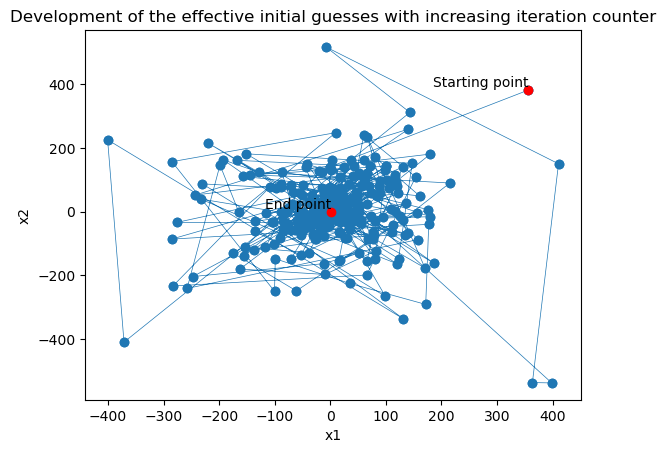

In [64]:
# Setting up a plot to show how the initial guesses x_k0 vary with the progress of the iteration counter k:


# turning the list of effective initial guesses into a numpy-array
eff_initial_guesses_global_list = np.array(eff_initial_guesses_global_list)

# extracting the x1 and x2 values 
x1 = eff_initial_guesses_global_list[:, 0]
x2 = eff_initial_guesses_global_list[:, 1]

# plotting x1 and x2 values against each other and connecting the dots with a line from start to finish
plt.figure                                                                                              # setting figure
plt.scatter(x1, x2)                                                                                     # creating scatterplot
plt.plot(x1, x2, '-o', linewidth=0.5)                                                                   # creating a line plot over the top to connect the dots
plt.plot(x1[0], x2[0], '-o', linewidth=0.5, color='red')                                                # marking start red
plt.plot(x1[-1], x2[-1], '-o', linewidth=0.5, color='red')                                              # marking end red
plt.text(x1[0], x2[0], 'Starting point', ha='right', va='bottom')                                       # labeling start
plt.text(x1[-1], x2[-1], 'End point', ha='right', va='bottom')                                          # labeling end 
plt.xlabel('x1')                                                                                        # labeling axis
plt.ylabel('x2')                                                                                        # labeling axis
plt.title('Development of the effective initial guesses with increasing iteration counter')             # title
plt.show()                                                                                              # make plot show up

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [65]:
# write your code here